# Traditional ML

In [2]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
#Loads the Telco dataset from CSV. Always show the file name and source in the report.
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Drop duplicates
df = df.drop_duplicates()
print("Initial shape:", df.shape)
df.head()

Initial shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# --- Keep only selected columns ---
df = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]]

In [5]:
# --- Clean and prepare data ---
# Handle TotalCharges that may contain blank strings
# Converts TotalCharges to numeric and forces non-numeric entries (often blank strings) to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# Drops rows with missing values 
df.dropna(inplace=True)

In [6]:
# Encode target column Churn as integers (Yes→1, No→0)
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])  # Yes=1, No=0

In [7]:
# Split features and target
X = df[["tenure", "MonthlyCharges", "TotalCharges"]]
y = df["Churn"]

In [8]:
# Standardise features
# StandardScaler removes mean and scales to unit variance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train/test split
# 80/20 split with fixed random_state for reproducibility, same sequence of random numbers is generated every time
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# --- Train Random Forest Classifier ---
# 100 tree RB
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# --- Evaluate Model ---
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Classifier Performance:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Classifier Performance:
Accuracy : 0.760
Precision: 0.565
Recall   : 0.428
F1-score : 0.487

Confusion Matrix:
 [[910 123]
 [214 160]]


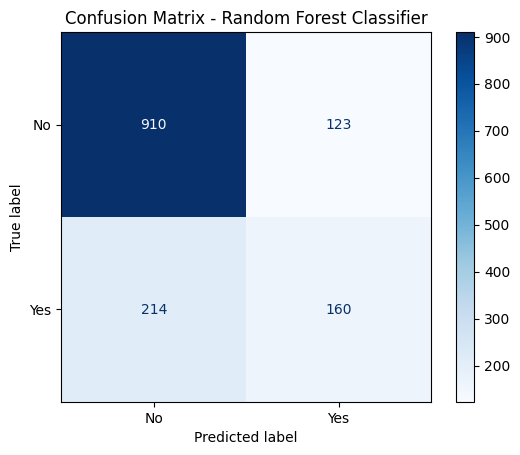

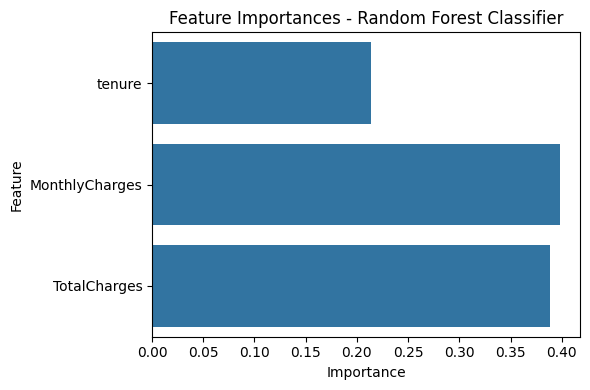

In [12]:
# --- Confusion Matrix Plot ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# --- Feature Importance Plot ---
feature_importances = rf.feature_importances_
features = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(6,4))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances - Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Feedforward Neural Network

In [14]:
# --- Imports for NN  ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [15]:
# Reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [16]:
# --- Prepare data (we already have X_train, X_test, y_train, y_test and scaler) ---
# Ensure numpy arrays and correct dtype
X_train_arr = np.array(X_train, dtype=np.float32)
X_test_arr  = np.array(X_test, dtype=np.float32)
y_train_arr = np.array(y_train, dtype=np.float32)
y_test_arr  = np.array(y_test, dtype=np.int32)

print("Shapes:", X_train_arr.shape, X_test_arr.shape, y_train_arr.shape, y_test_arr.shape)

Shapes: (5625, 3) (1407, 3) (5625,) (1407,)


In [17]:
# --- Build the model (clean input definition to avoid warnings) ---
input_dim = X_train_arr.shape[1]

# Keras Class
nn_model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')   # binary classification
])

nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# --- Callbacks (EarlyStopping to avoid overfitting) ---
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [19]:
# --- Train ---
history = nn_model.fit(
    X_train_arr, y_train_arr,
    validation_split=0.2,   # 20% of train used for validation
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7376 - loss: 0.5559 - val_accuracy: 0.7920 - val_loss: 0.4854
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.7644 - loss: 0.4883 - val_accuracy: 0.7867 - val_loss: 0.4617
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.7704 - loss: 0.4737 - val_accuracy: 0.7876 - val_loss: 0.4534
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7736 - loss: 0.4723 - val_accuracy: 0.7947 - val_loss: 0.4505
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.7758 - loss: 0.4641 - val_accuracy: 0.7947 - val_loss: 0.4477
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.7767 - loss: 0.4652 - val_accuracy: 0.7938 - val_loss: 0.4465
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.7804 - loss: 0.4631 - val_accuracy: 0.7929 - val_loss: 0.4442
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7767 - loss: 0.4638 - va

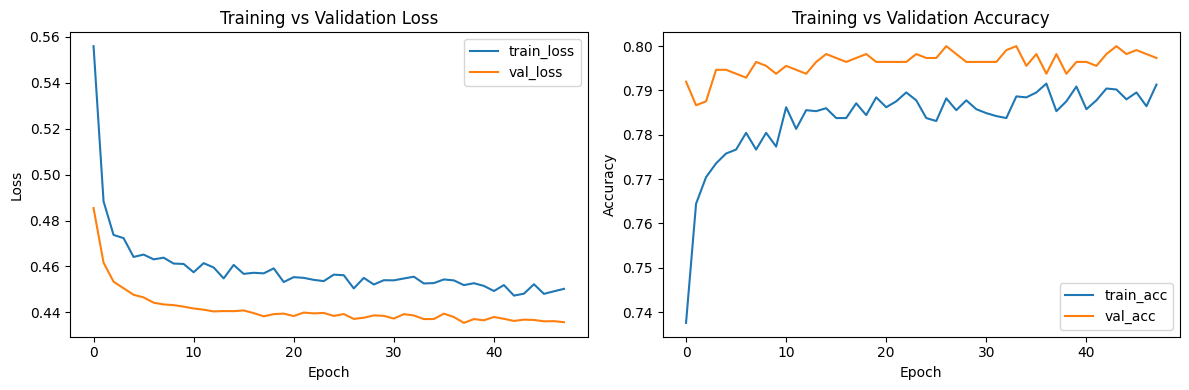

In [20]:
# --- Plot training curves ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step

Neural Network Classifier Performance:
Accuracy : 0.779
Precision: 0.631
Recall   : 0.406
F1-score : 0.494


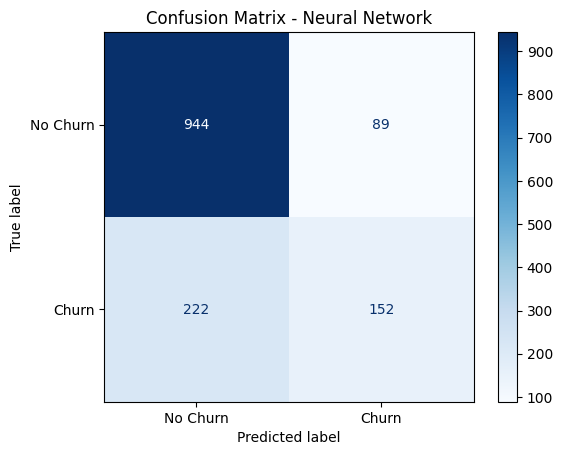


Classification Report:

              precision    recall  f1-score   support

    No Churn       0.81      0.91      0.86      1033
       Churn       0.63      0.41      0.49       374

    accuracy                           0.78      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.76      0.78      0.76      1407



In [21]:
# --- Evaluate on test set ---
test_loss, test_acc = nn_model.evaluate(X_test_arr, y_test_arr, verbose=0)
y_prob = nn_model.predict(X_test_arr)
y_pred_nn = (y_prob > 0.5).astype("int32").flatten()

acc_nn  = accuracy_score(y_test_arr, y_pred_nn)
prec_nn = precision_score(y_test_arr, y_pred_nn)
rec_nn  = recall_score(y_test_arr, y_pred_nn)
f1_nn   = f1_score(y_test_arr, y_pred_nn)

print("\nNeural Network Classifier Performance:")
print(f"Accuracy : {acc_nn:.3f}")
print(f"Precision: {prec_nn:.3f}")
print(f"Recall   : {rec_nn:.3f}")
print(f"F1-score : {f1_nn:.3f}")

# --- Confusion matrix ---
cm_nn = confusion_matrix(y_test_arr, y_pred_nn)
ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Churn','Churn']).plot(cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.show()

# --- Classification report ---
print("\nClassification Report:\n")
print(classification_report(y_test_arr, y_pred_nn, target_names=['No Churn','Churn']))